<a href="https://colab.research.google.com/github/rkundala/mortgage/blob/main/MortgageCal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

Mortgage Analysis Notebook
Loan Amount: $400,000.00
Interest Rate: 6.5%
Loan Term: 30 years
Monthly Payment: $2,528.27

Amortization Schedule Summary:
Total Payments: 360
Total Interest Paid: $510,177.95
Total Amount Paid: $910,177.95

First 12 Payments:
    Payment_Number  Total_Payment  Principal_Payment  Interest_Payment  \
0                1        2528.27             361.61           2166.67   
1                2        2528.27             363.56           2164.71   
2                3        2528.27             365.53           2162.74   
3                4        2528.27             367.51           2160.76   
4                5        2528.27             369.50           2158.77   
5                6        2528.27             371.51           2156.77   
6                7        2528.27             373.52           2154.75   
7                8        2528.27             375.54           2152.73   
8                9        2528.27             377.58           2150.70   
9    

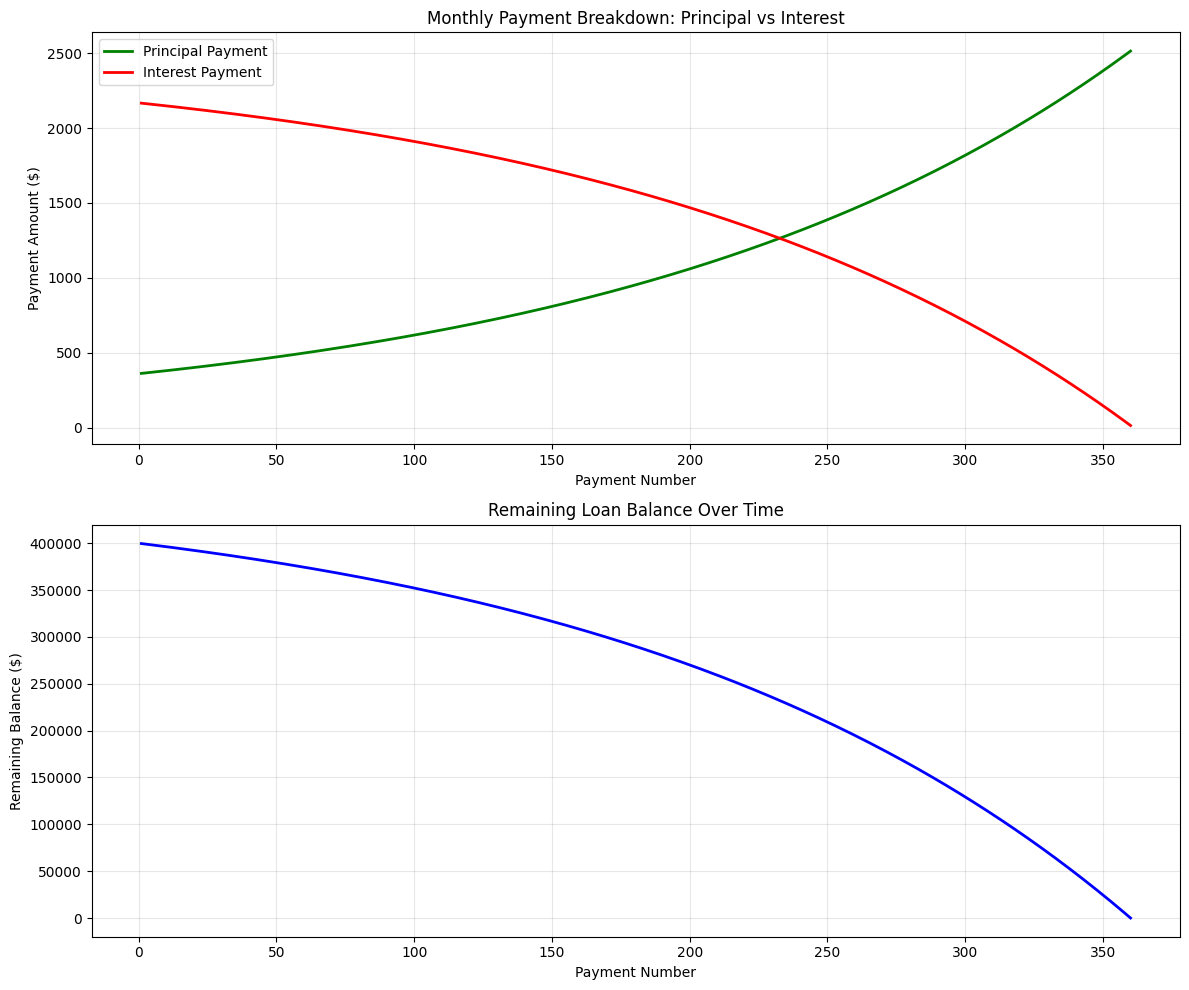


Mortgage Scenario Comparison:
            Scenario  Loan_Amount Interest_Rate  Term_Years  Extra_Payment Monthly_Payment  Total_Payments Total_Interest  Total_Cost Interest_Savings
       30-Year Fixed       400000          6.5%          30              0       $2,528.27             360    $510,177.95 $910,177.95            $0.00
       15-Year Fixed       400000          6.0%          15              0       $3,375.43             180    $207,576.92 $607,576.92      $302,601.04
30-Year + $200 Extra       400000          6.5%          30            200       $2,728.27             293    $398,286.42 $798,286.42      $111,891.54
30-Year + $500 Extra       400000          6.5%          30            500       $3,028.27             233    $304,620.81 $704,620.81      $205,557.14


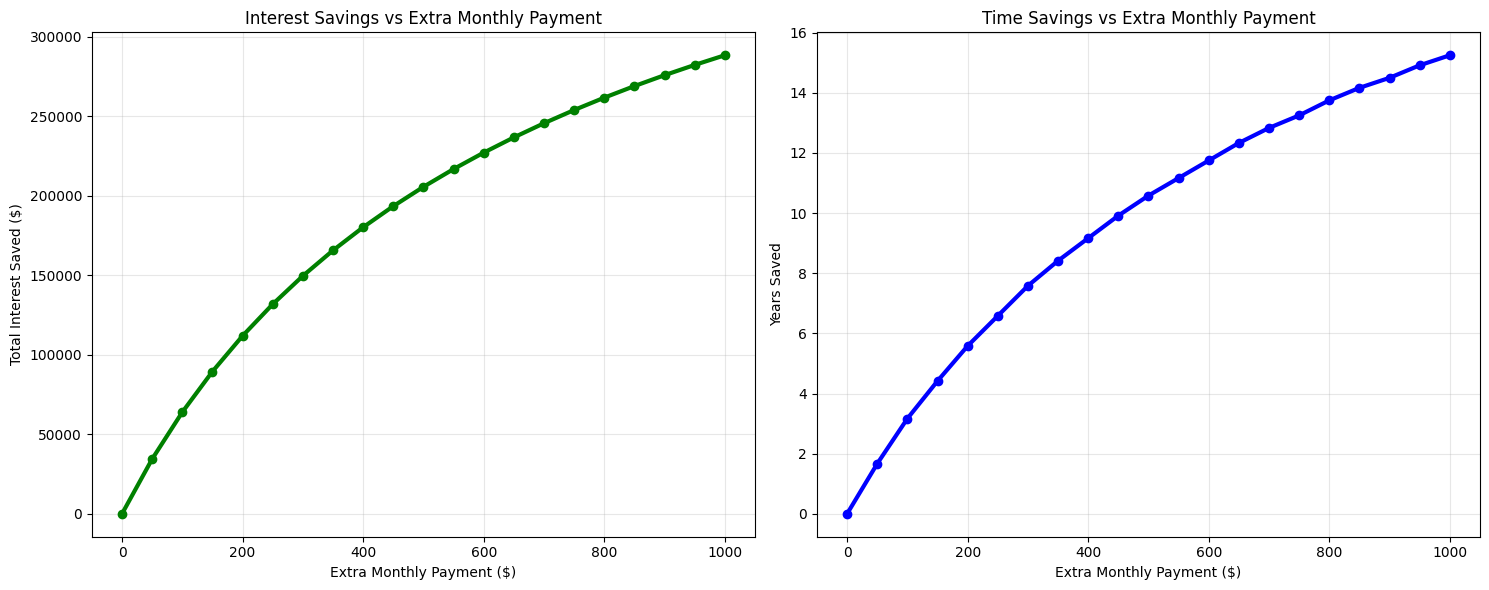


Extra Payment Impact Analysis:
 Extra_Payment Years_Saved Interest_Saved Total_Interest
             0         0.0          $0.00    $510,177.95
           100         3.2     $63,917.25    $446,260.70
           200         5.6    $111,891.54    $398,286.42
           500        10.6    $205,557.14    $304,620.81

Affordability Analysis (Monthly Income: $8,000, Debt: $500):
Maximum Home Value: $270,675.54
Required Down Payment (20%): $54,135.11
Loan Amount: $216,540.43

Monthly Payment Breakdown:
  Principal & Interest: $1,379.10
  Property Taxes: $270.68
  Insurance: $90.23
  PMI: $0.00
  Total Monthly Payment: $1,740.00


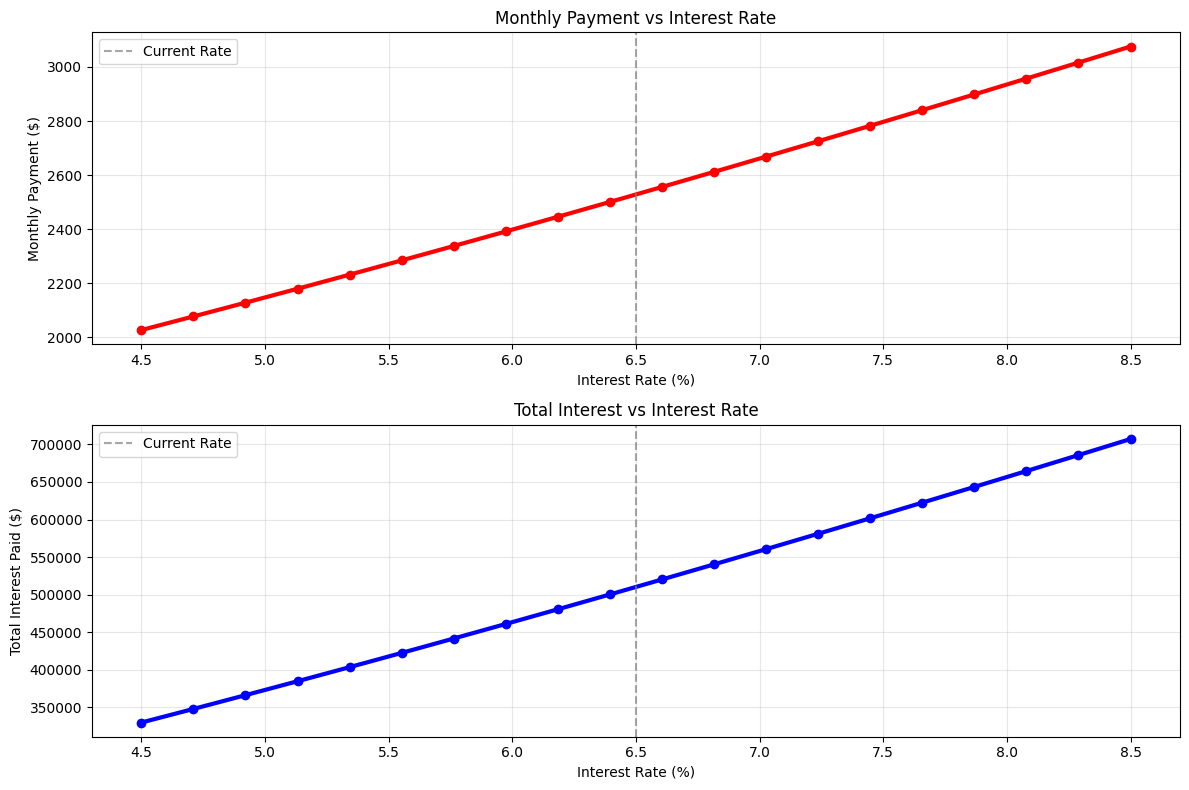


Interest Rate Sensitivity (±2% from base rate):
Interest_Rate Monthly_Payment Total_Interest
         4.5%       $2,026.74    $329,626.85
         8.5%       $3,075.65    $707,235.42

MORTGAGE ANALYSIS COMPLETE
This notebook provides comprehensive mortgage calculations and analysis.
Modify the parameters above to analyze your specific mortgage scenarios.


In [4]:
# Mortgage Calculator and Analysis
# A comprehensive Jupyter notebook for mortgage calculations

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

print("Mortgage Analysis Notebook")
print("=" * 50)

## 1. Basic Mortgage Payment Calculator

def calculate_monthly_payment(principal, annual_rate, years):
    """
    Calculate monthly mortgage payment using the standard formula.

    Parameters:
    principal (float): Loan amount
    annual_rate (float): Annual interest rate (as decimal, e.g., 0.05 for 5%)
    years (int): Loan term in years

    Returns:
    float: Monthly payment amount
    """
    monthly_rate = annual_rate / 12
    num_payments = years * 12

    if monthly_rate == 0:
        return principal / num_payments

    monthly_payment = principal * (monthly_rate * (1 + monthly_rate)**num_payments) / \
                     ((1 + monthly_rate)**num_payments - 1)

    return monthly_payment

# Example calculation
loan_amount = 400000  # $400,000
interest_rate = 0.065  # 6.5% annual
loan_term = 30  # 30 years

monthly_payment = calculate_monthly_payment(loan_amount, interest_rate, loan_term)
print(f"Loan Amount: ${loan_amount:,.2f}")
print(f"Interest Rate: {interest_rate:.1%}")
print(f"Loan Term: {loan_term} years")
print(f"Monthly Payment: ${monthly_payment:,.2f}")

## 2. Amortization Schedule Generator

def generate_amortization_schedule(principal, annual_rate, years, extra_payment=0):
    """
    Generate a complete amortization schedule.

    Parameters:
    principal (float): Loan amount
    annual_rate (float): Annual interest rate (as decimal)
    years (int): Loan term in years
    extra_payment (float): Additional monthly payment toward principal

    Returns:
    pandas.DataFrame: Complete amortization schedule
    """
    monthly_rate = annual_rate / 12
    num_payments = years * 12

    # Calculate base monthly payment
    if monthly_rate == 0:
        base_payment = principal / num_payments
    else:
        base_payment = principal * (monthly_rate * (1 + monthly_rate)**num_payments) / \
                      ((1 + monthly_rate)**num_payments - 1)

    # Initialize schedule
    schedule = []
    remaining_balance = principal
    payment_num = 0
    start_date = datetime.now()

    while remaining_balance > 0.01 and payment_num < num_payments:
        payment_num += 1
        payment_date = start_date + timedelta(days=30 * (payment_num - 1))

        # Calculate interest for this month
        interest_payment = remaining_balance * monthly_rate

        # Calculate principal payment
        if remaining_balance < base_payment + extra_payment:
            # Final payment
            principal_payment = remaining_balance
            total_payment = principal_payment + interest_payment
        else:
            principal_payment = base_payment - interest_payment + extra_payment
            total_payment = base_payment + extra_payment

        # Update remaining balance
        remaining_balance -= principal_payment

        # Add to schedule
        schedule.append({
            'Payment_Number': payment_num,
            'Payment_Date': payment_date.strftime('%Y-%m-%d'),
            'Total_Payment': total_payment,
            'Principal_Payment': principal_payment,
            'Interest_Payment': interest_payment,
            'Remaining_Balance': max(0, remaining_balance),
            'Cumulative_Interest': sum([row['Interest_Payment'] for row in schedule]) + interest_payment,
            'Cumulative_Principal': principal - max(0, remaining_balance)
        })

    return pd.DataFrame(schedule)

# Generate amortization schedule
schedule_df = generate_amortization_schedule(loan_amount, interest_rate, loan_term)

print(f"\nAmortization Schedule Summary:")
print(f"Total Payments: {len(schedule_df)}")
print(f"Total Interest Paid: ${schedule_df['Interest_Payment'].sum():,.2f}")
print(f"Total Amount Paid: ${schedule_df['Total_Payment'].sum():,.2f}")

# Display first few payments
print("\nFirst 12 Payments:")
print(schedule_df.head(12)[['Payment_Number', 'Total_Payment', 'Principal_Payment', 'Interest_Payment', 'Remaining_Balance']].round(2))

## 3. Visualization: Payment Breakdown Over Time

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot 1: Principal vs Interest over time
ax1.plot(schedule_df['Payment_Number'], schedule_df['Principal_Payment'],
         label='Principal Payment', linewidth=2, color='green')
ax1.plot(schedule_df['Payment_Number'], schedule_df['Interest_Payment'],
         label='Interest Payment', linewidth=2, color='red')
ax1.set_title('Monthly Payment Breakdown: Principal vs Interest')
ax1.set_xlabel('Payment Number')
ax1.set_ylabel('Payment Amount ($)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Remaining balance over time
ax2.plot(schedule_df['Payment_Number'], schedule_df['Remaining_Balance'],
         linewidth=2, color='blue')
ax2.set_title('Remaining Loan Balance Over Time')
ax2.set_xlabel('Payment Number')
ax2.set_ylabel('Remaining Balance ($)')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Mortgage Comparison Tool

def compare_mortgages(scenarios):
    """
    Compare multiple mortgage scenarios.

    Parameters:
    scenarios (list): List of dictionaries with mortgage parameters

    Returns:
    pandas.DataFrame: Comparison table
    """
    results = []

    for i, scenario in enumerate(scenarios, 1):
        principal = scenario['principal']
        rate = scenario['rate']
        years = scenario['years']
        extra = scenario.get('extra_payment', 0)
        name = scenario.get('name', f'Scenario {i}')

        # Calculate monthly payment
        monthly_payment = calculate_monthly_payment(principal, rate, years)

        # Generate schedule to get totals
        schedule = generate_amortization_schedule(principal, rate, years, extra)

        results.append({
            'Scenario': name,
            'Loan_Amount': principal,
            'Interest_Rate': f"{rate:.1%}",
            'Term_Years': years,
            'Extra_Payment': extra,
            'Monthly_Payment': monthly_payment + extra,
            'Total_Payments': len(schedule),
            'Total_Interest': schedule['Interest_Payment'].sum(),
            'Total_Cost': schedule['Total_Payment'].sum(),
            'Interest_Savings': None  # Will calculate after
        })

    comparison_df = pd.DataFrame(results)

    # Calculate interest savings compared to first scenario
    base_interest = comparison_df.iloc[0]['Total_Interest']
    comparison_df['Interest_Savings'] = base_interest - comparison_df['Total_Interest']

    return comparison_df

# Compare different mortgage scenarios
mortgage_scenarios = [
    {
        'name': '30-Year Fixed',
        'principal': 400000,
        'rate': 0.065,
        'years': 30,
        'extra_payment': 0
    },
    {
        'name': '15-Year Fixed',
        'principal': 400000,
        'rate': 0.060,
        'years': 15,
        'extra_payment': 0
    },
    {
        'name': '30-Year + $200 Extra',
        'principal': 400000,
        'rate': 0.065,
        'years': 30,
        'extra_payment': 200
    },
    {
        'name': '30-Year + $500 Extra',
        'principal': 400000,
        'rate': 0.065,
        'years': 30,
        'extra_payment': 500
    }
]

comparison_results = compare_mortgages(mortgage_scenarios)
print("\nMortgage Scenario Comparison:")
print("=" * 80)
for col in ['Monthly_Payment', 'Total_Interest', 'Total_Cost', 'Interest_Savings']:
    if col in comparison_results.columns:
        comparison_results[col] = comparison_results[col].apply(lambda x: f"${x:,.2f}" if pd.notnull(x) and x != 0 else "$0.00")

print(comparison_results.to_string(index=False))

## 5. Extra Payment Impact Analysis

def extra_payment_analysis(principal, annual_rate, years, max_extra=1000, step=50):
    """
    Analyze the impact of different extra payment amounts.
    """
    extra_amounts = list(range(0, max_extra + step, step))
    results = []

    for extra in extra_amounts:
        schedule = generate_amortization_schedule(principal, annual_rate, years, extra)

        results.append({
            'Extra_Payment': extra,
            'Total_Payments': len(schedule),
            'Years_Saved': (years * 12 - len(schedule)) / 12,
            'Total_Interest': schedule['Interest_Payment'].sum(),
            'Interest_Saved': generate_amortization_schedule(principal, annual_rate, years, 0)['Interest_Payment'].sum() - schedule['Interest_Payment'].sum(),
            'Total_Cost': schedule['Total_Payment'].sum()
        })

    return pd.DataFrame(results)

# Analyze extra payment impact
extra_analysis_df = extra_payment_analysis(loan_amount, interest_rate, loan_term)

# Plot extra payment impact
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Interest savings vs extra payment
ax1.plot(extra_analysis_df['Extra_Payment'], extra_analysis_df['Interest_Saved'],
         linewidth=3, color='green', marker='o')
ax1.set_title('Interest Savings vs Extra Monthly Payment')
ax1.set_xlabel('Extra Monthly Payment ($)')
ax1.set_ylabel('Total Interest Saved ($)')
ax1.grid(True, alpha=0.3)

# Years saved vs extra payment
ax2.plot(extra_analysis_df['Extra_Payment'], extra_analysis_df['Years_Saved'],
         linewidth=3, color='blue', marker='o')
ax2.set_title('Time Savings vs Extra Monthly Payment')
ax2.set_xlabel('Extra Monthly Payment ($)')
ax2.set_ylabel('Years Saved')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show some key data points
print("\nExtra Payment Impact Analysis:")
print("=" * 50)
key_points = extra_analysis_df[extra_analysis_df['Extra_Payment'].isin([0, 100, 200, 500])]
for col in ['Total_Interest', 'Interest_Saved', 'Total_Cost']:
    key_points[col] = key_points[col].apply(lambda x: f"${x:,.2f}")
key_points['Years_Saved'] = key_points['Years_Saved'].apply(lambda x: f"{x:.1f}")

print(key_points[['Extra_Payment', 'Years_Saved', 'Interest_Saved', 'Total_Interest']].to_string(index=False))

## 6. Affordability Calculator

def affordability_calculator(monthly_income, debt_payments=0, down_payment_percent=0.20,
                           interest_rate=0.065, loan_term=30, property_tax_rate=0.012,
                           insurance_rate=0.004, pmi_rate=0.005, debt_to_income_ratio=0.28):
    """
    Calculate how much house you can afford based on income and expenses.
    """
    # Calculate maximum monthly housing payment (28% of gross income typically)
    max_monthly_housing = monthly_income * debt_to_income_ratio - debt_payments

    # Estimate property tax and insurance as percentage of home value
    # We need to solve for home value, so we'll use iterative approach

    # Start with an estimate
    estimated_home_value = 400000

    for _ in range(10):  # Iterate to converge on solution
        property_tax_monthly = estimated_home_value * property_tax_rate / 12
        insurance_monthly = estimated_home_value * insurance_rate / 12

        # PMI if down payment < 20%
        pmi_monthly = 0
        if down_payment_percent < 0.20:
            pmi_monthly = estimated_home_value * pmi_rate / 12

        # Available for principal and interest
        available_for_pi = max_monthly_housing - property_tax_monthly - insurance_monthly - pmi_monthly

        # Calculate loan amount
        loan_amount = estimated_home_value * (1 - down_payment_percent)

        # Calculate what the P&I payment would be
        pi_payment = calculate_monthly_payment(loan_amount, interest_rate, loan_term)

        # Adjust estimate
        if pi_payment > available_for_pi:
            estimated_home_value *= 0.95
        elif pi_payment < available_for_pi * 0.98:
            estimated_home_value *= 1.02
        else:
            break

    loan_amount = estimated_home_value * (1 - down_payment_percent)
    down_payment = estimated_home_value * down_payment_percent

    return {
        'max_home_value': estimated_home_value,
        'loan_amount': loan_amount,
        'down_payment': down_payment,
        'monthly_pi': available_for_pi,
        'monthly_taxes': property_tax_monthly,
        'monthly_insurance': insurance_monthly,
        'monthly_pmi': pmi_monthly,
        'total_monthly_payment': max_monthly_housing
    }

# Example affordability calculation
monthly_income = 8000  # $8,000 monthly income
debt_payments = 500    # $500 in other debt payments

affordability = affordability_calculator(monthly_income, debt_payments)

print(f"\nAffordability Analysis (Monthly Income: ${monthly_income:,}, Debt: ${debt_payments:,}):")
print("=" * 70)
print(f"Maximum Home Value: ${affordability['max_home_value']:,.2f}")
print(f"Required Down Payment (20%): ${affordability['down_payment']:,.2f}")
print(f"Loan Amount: ${affordability['loan_amount']:,.2f}")
print(f"\nMonthly Payment Breakdown:")
print(f"  Principal & Interest: ${affordability['monthly_pi']:,.2f}")
print(f"  Property Taxes: ${affordability['monthly_taxes']:,.2f}")
print(f"  Insurance: ${affordability['monthly_insurance']:,.2f}")
print(f"  PMI: ${affordability['monthly_pmi']:,.2f}")
print(f"  Total Monthly Payment: ${affordability['total_monthly_payment']:,.2f}")

## 7. Interest Rate Sensitivity Analysis

def rate_sensitivity_analysis(principal, base_rate, years, rate_range=0.02, steps=20):
    """
    Analyze how payment changes with interest rate variations.
    """
    rates = np.linspace(base_rate - rate_range, base_rate + rate_range, steps)
    results = []

    for rate in rates:
        if rate > 0:  # Ensure positive rate
            payment = calculate_monthly_payment(principal, rate, years)
            schedule = generate_amortization_schedule(principal, rate, years)
            total_interest = schedule['Interest_Payment'].sum()

            results.append({
                'Interest_Rate': rate,
                'Monthly_Payment': payment,
                'Total_Interest': total_interest,
                'Total_Cost': schedule['Total_Payment'].sum()
            })

    return pd.DataFrame(results)

# Perform rate sensitivity analysis
rate_sensitivity_df = rate_sensitivity_analysis(loan_amount, interest_rate, loan_term)

# Plot rate sensitivity
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
plt.plot(rate_sensitivity_df['Interest_Rate'] * 100, rate_sensitivity_df['Monthly_Payment'],
         linewidth=3, color='red', marker='o')
plt.axvline(interest_rate * 100, color='gray', linestyle='--', alpha=0.7, label='Current Rate')
plt.title('Monthly Payment vs Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Monthly Payment ($)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rate_sensitivity_df['Interest_Rate'] * 100, rate_sensitivity_df['Total_Interest'],
         linewidth=3, color='blue', marker='o')
plt.axvline(interest_rate * 100, color='gray', linestyle='--', alpha=0.7, label='Current Rate')
plt.title('Total Interest vs Interest Rate')
plt.xlabel('Interest Rate (%)')
plt.ylabel('Total Interest Paid ($)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\nInterest Rate Sensitivity (±2% from base rate):")
print("=" * 55)
sample_rates = rate_sensitivity_df[rate_sensitivity_df['Interest_Rate'].isin(
    rate_sensitivity_df['Interest_Rate'].quantile([0, 0.25, 0.5, 0.75, 1.0]).values
)].copy()
sample_rates['Interest_Rate'] = sample_rates['Interest_Rate'].apply(lambda x: f"{x:.1%}")
sample_rates['Monthly_Payment'] = sample_rates['Monthly_Payment'].apply(lambda x: f"${x:,.2f}")
sample_rates['Total_Interest'] = sample_rates['Total_Interest'].apply(lambda x: f"${x:,.2f}")
print(sample_rates[['Interest_Rate', 'Monthly_Payment', 'Total_Interest']].to_string(index=False))

print("\n" + "="*70)
print("MORTGAGE ANALYSIS COMPLETE")
print("This notebook provides comprehensive mortgage calculations and analysis.")
print("Modify the parameters above to analyze your specific mortgage scenarios.")
print("="*70)